# 가설 검정(Hypothesis Testing)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime

## Microsoft사의 주식의 평균 수익률이 양수인지 검증하기

### 가설 수립
1. $H_0$ : Microsoft사의 주식의 평균 수익률이 0이하이다.
2. $H_1$ : Microsoft사의 주식의 평균 수익률이 0이상이다.

데이터 읽기

In [2]:
MSFT = pd.read_csv("MSFT.csv")

문자열로 표현된 날짜를 Date타입의 데이터로 바꿔준다.

In [3]:
Date = MSFT.Date
Date1 = []
for x in Date[:]:
    Date1.append(datetime.strptime(x,'%Y-%m-%d' ))

날짜별 수익률을 구한다.

In [4]:
pricing_sample = MSFT.loc[:,('Date','Adj Close')]
price = MSFT['Adj Close']
returns = price.pct_change()[1:]  #start from 1, because 0 has no previous day's data, thus no pct change

주식 가격

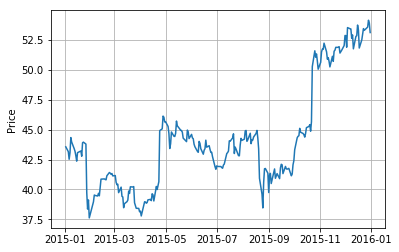

In [5]:
plt.plot(Date1,price[:])
plt.grid()
plt.ylabel('Price')
plt.show()

주식 수익률

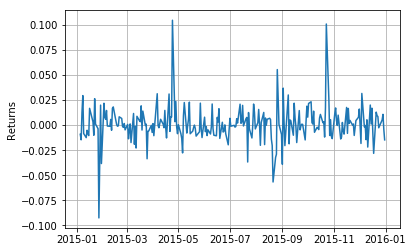

In [6]:
plt.plot(Date1[1:],returns[:])
plt.grid()
plt.ylabel('Returns')
plt.show()

정규 분포의 $95\%$ 신뢰 구간 

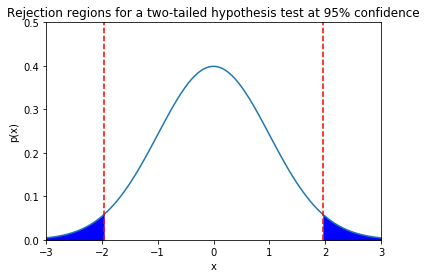

In [7]:
x = np.linspace(-3, 3, 100)
norm_pdf = lambda x: (1/np.sqrt(2 * np.pi)) * np.exp(-x * x / 2)
y = norm_pdf(x)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(x, y)
ax.fill_between(x, 0, y, where = x > 1.96, color='blue')
ax.fill_between(x, 0, y, where = x < -1.96, color='blue')
plt.plot([1.96,1.96],[0,0.5], 'r--')
plt.plot([-1.96,-1.96],[0,0.5], 'r--')
plt.title('Rejection regions for a two-tailed hypothesis test at 95% confidence')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xlim(-3,3)
plt.ylim(0,0.5)
plt.show()

수익률의 통계량 계산

In [8]:
n = len(returns)
test_statistic = ((returns.mean() - 0) /
                (returns.std()/np.sqrt(n)))
print ('t test statistic: ', test_statistic)

('t test statistic: ', 0.84112394063118812)


In [9]:
from scipy.stats import t
p_val = (1 - t.cdf(test_statistic, n - 1))
print('P-value is: ', p_val)

('P-value is: ', 0.20054115167773334)


P-value가 0.05보다 크므로, $H_0$를 기각할 수 없다.

## 두 집단의 평균 비교
APPLE사의 주식의 평균 수익률이 시장의 평균 수익률이 다른지 검증

### 가설 수립
1. $H_0$ : APPLE사의 주식의 평균 수익률에서 시장의 평균 수익률을 뺀 값이 0이다.
2. $H_1$ : APPLE사의 주식의 평균 수익률에서 시장의 평균 수익률을 뺀 값은 0이 아니다.

데이터 불러오기 & 수익률 계산

In [10]:
SPY = pd.read_csv("SPY.csv")
AAPL = pd.read_csv("AAPL.csv")

In [11]:
SPY_price = SPY['Adj Close']
AAPL_price = AAPL['Adj Close']
SPY_returns = SPY_price.pct_change()[1:]
AAPL_returns = AAPL_price.pct_change()[1:]

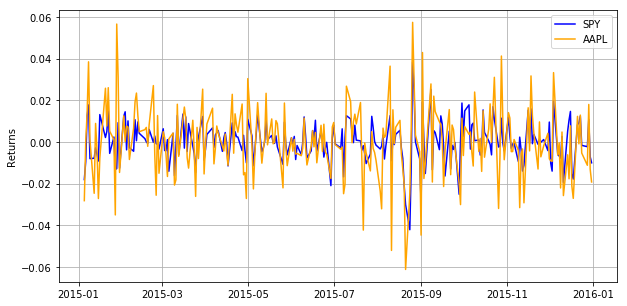

In [12]:
plt.figure(1, figsize = (10, 5))
plt.plot(Date1[1:],SPY_returns,label='SPY', color = 'blue')
plt.plot(Date1[1:],AAPL_returns,label='AAPL', color = 'orange')
plt.grid()
plt.ylabel('Returns')
plt.legend()
plt.show()

### 두 집단이 정규분포를 따르고, 분산은 같지만, 분산값이 알려져 있지 않은 경우 
두 집단의 평균 비교는 다음의 통계량을 이용한다.

$$ t = \frac{(\bar{X}_1 - \bar{X}_2) - (\mu_1 - \mu_2)}{(\frac{s_p^2}{n_1} + \frac{s_p^2}{n_2})^{1/2}} = \frac{\bar{X}_1 - \bar{X}_2}{(\frac{s_p^2}{n_1} + \frac{s_p^2}{n_2})^{1/2}}$$

$$s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2)}{n_1 + n_2 - 2}$$

이 경우 t는 t-분포를 따르고, 자유도는 $n_1 + n_2 - 2$가 된다.

### 두 집단이 정규분포를 따르지만, 분산값이 알려져 있지 않은 경우 
두 집단의 평균 비교는 다음의 통계량을 이용한다.

$$ t = \frac{(\bar{X}_1 - \bar{X}_2) - (\mu_1 - \mu_2)}{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^{1/2}} = \frac{\bar{X}_1 - \bar{X}_2}{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^{1/2}}$$
$s_1^2$, $s_2^2$은 각각의 표본 분산이다.

이 경우 t는 t-분포를 따르고, 자유도는 $df = \frac{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^2}{\frac{(s_1^2/n_1)^2}{n_1} + \frac{(s_2^2/n_2)^2}{n_2}}$가 된다.




통계량 계산

In [13]:
mu_spy = SPY_returns.mean()
mu_aapl = AAPL_returns.mean()
s_spy = SPY_returns.std()
s_aapl = AAPL_returns.std()
n_spy = len(SPY_returns)
n_aapl = len(AAPL_returns)

test_statistic = ((mu_spy - mu_aapl) - 0)/((s_spy**2/n_spy) + (s_aapl**2/n_aapl))**0.5
df = ((s_spy**2/n_spy) + (s_aapl**2/n_aapl))**2/(((s_spy**2 / n_spy)**2 /n_spy)+((s_aapl**2 / n_aapl)**2/n_aapl))

print('t test statistic: ', test_statistic)
print('Degrees of freedom (modified): ', df)

t test statistic:  0.03289457218991762
Degrees of freedom (modified):  401.67605688205106


자유도가 매우 높을 때(>30)의 t-distribution은 정규분포에 근사하므로, 신뢰도 $95\%$ 구간은 [-1.96, 1.96]이다. 따라서, 귀무가설을 기각할 수 없다.

## P-value의 이해

P-value는 귀무가설을 가정할 때, 통계량이 귀무가설 보다 더 극한의 값을 가질 확률을 의미하는 것이지, $H_1$이 맞을 확률이 아니다.

### 실험의 반복

$H_0$를 기각했을 때, 실제로 $H_0$인 경우를 제 1종 오류(Type 1 error)라고 한다. Type 1 error의 확률은 유의수준(siginificant level)과 같다. 실제로 Type 1 error가 나올 확률이 유의 수준과 같은지 확인해 보자.

In [14]:
df = pd.DataFrame()
N = 20
T = 100

for i in range(N):
    X = np.random.normal(0, 1, T)
    X = pd.Series(X)
    name = 'X{}'.format(i)
    df[name] = X

In [15]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,0.175537,-0.467221,0.424849,0.571282,0.034902,-0.409120,1.425342,1.091877,1.409374,1.617891,-0.570400,-0.120251,0.840471,0.884808,0.862939,-0.748725,-1.302708,1.440809,1.027648,0.492528
1,-1.662064,0.478871,-0.592322,-0.681347,1.285842,1.600099,-2.096429,0.614549,-0.168944,-1.588948,0.635385,1.118846,-0.347213,0.970852,1.211226,0.449827,-0.494872,-0.111234,-0.773736,2.085761
2,0.438859,-0.295928,0.664434,-0.821386,-0.349502,-1.769090,0.572678,0.024675,0.931140,0.686520,0.114107,0.035026,0.209266,1.186428,0.097531,0.608486,1.515488,1.601283,-0.517930,0.326691
3,-1.521377,-0.656137,0.397828,-2.129853,0.519513,0.076838,1.011120,0.388712,-0.632458,0.169148,-0.537790,1.246120,0.990979,-0.244746,1.807023,0.689833,0.875807,0.116409,-1.947114,-0.973243
4,-1.684715,2.006528,-0.811553,-1.663534,-0.712230,-0.906841,-0.236641,0.823602,-0.687149,-0.012441,-0.275745,-0.287466,0.060345,1.233837,-0.444766,0.493762,0.398808,-0.711685,0.339307,-0.768572


In [16]:
cutoff = 0.05

significant_pairs = []

for i in range(N):
    for j in range(i+1, N):
        Xi = df.iloc[:, i]
        Xj = df.iloc[:, j]
        
        results = stats.spearmanr(Xi, Xj)
        
        pvalue = results[1]
        
        if pvalue < cutoff:
            significant_pairs.append((i, j))

In [ ]:
#newly added code during the class
cutoff = 0.05
Typer1error=0
for i in range(N):
    Xi = df.iloc[:, i]
    test_statistic = ((Xi.mean() - 0)/
                      (Xi.std()/np.sqrt(n)))
    pvalue = (1- t.cdf(test_statistic, T-1))
    if pvalue < cutoff:
        Type1error += i
Type1error

In [17]:
(N * (N-1) / 2) * 0.05

9.5

In [18]:
len(significant_pairs)

13

횟수를 좀 더 늘려서 시도하기 위해 함수 정의

In [19]:
def do_experiment(N, T, cutoff=0.05):
    df = pd.DataFrame()

    # Make random data
    for i in range(N):
        X = np.random.normal(0, 1, T)
        X = pd.Series(X)
        name = 'X%s' % i
        df[name] = X

    significant_pairs = []

    # Look for relationships
    for i in range(N):
        for j in range(i+1, N):
            Xi = df.iloc[:, i]
            Xj = df.iloc[:, j]

            results = stats.spearmanr(Xi, Xj)

            pvalue = results[1]

            if pvalue < cutoff:
                significant_pairs.append((i, j))
    
    return significant_pairs

In [ ]:
#newly added
def do_experiment(N, T, cutoff=0.05):
    df = pd.DataFrame()
    # Make random data
    for i in range(N):
        X = np.random.normal(0, 1, T)
        X = pd.Series(X)
        name = 'X%s' % i
        df[name] = X

    Typer1error=0
    
    for i in range(N):
        Xi = df.iloc[:, i]
        test_statistic = ((Xi.mean() - 0)/
                          (Xi.std()/np.sqrt(n)))
        pvalue = (1- t.cdf(test_statistic, T-1))
        if pvalue < cutoff:
            Type1error += i
    return Type1error/N

In [20]:
num_experiments = 100

results = np.zeros((num_experiments,))

for i in range(num_experiments):
    # Run a single experiment
    result = do_experiment(20, 100, cutoff=0.05)
    
    # Count how many pairs
    n = len(result)
    
    # Add to array
    results[i] = n

In [21]:
np.mean(results)

9.6099999999999994

P-value 자체도 하나의 확률 변수로 볼 수 있다. 실제로 P-value는 [0,1]사이에서 균등하게 분포 되어있다.

In [22]:
def get_pvalues_from_experiment(N, T):
    df = pd.DataFrame()

    # Make random data
    for i in range(N):
        X = np.random.normal(0, 1, T)
        X = pd.Series(X)
        name = 'X%s' % i
        df[name] = X

    pvalues = []

    # Look for relationships
    for i in range(N):
        for j in range(i+1, N):
            Xi = df.iloc[:, i]
            Xj = df.iloc[:, j]

            results = stats.spearmanr(Xi, Xj)

            pvalue = results[1]

            pvalues.append(pvalue)
    
    return pvalues


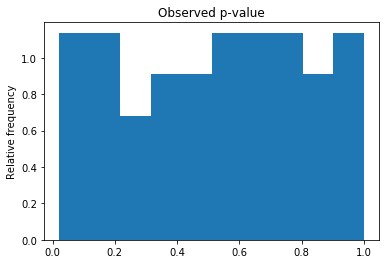

In [23]:
pvalues = get_pvalues_from_experiment(10, 100)
plt.hist(pvalues, normed=True)
plt.ylabel('Relative frequency')
plt.title('Observed p-value')
plt.show()

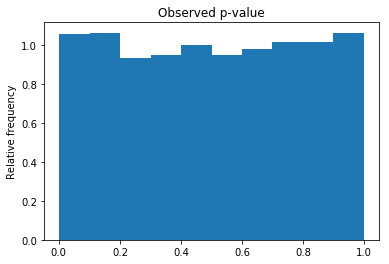

In [24]:
pvalues = get_pvalues_from_experiment(50, 100)
plt.hist(pvalues, normed=True)
plt.ylabel('Relative frequency')
plt.title('Observed p-value')
plt.show()

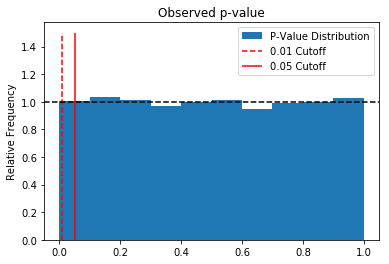

In [25]:
pvalues = get_pvalues_from_experiment(200, 100)
plt.vlines(0.01, 0, 1.5, colors='r', linestyle='--', label='0.01 Cutoff')
plt.vlines(0.05, 0, 1.5, colors='r', label='0.05 Cutoff')
plt.hlines(1, -0.05, 1.05, colors='k', linestyle = '--')
plt.hist(pvalues, label='P-Value Distribution', normed=True)
plt.legend()
plt.ylabel('Relative Frequency')
plt.title('Observed p-value')
plt.xlim(-0.05,1.05)
plt.show()